# Objects Detection and Segmentation

What is in the image?

![title](https://cbsnews3.cbsistatic.com/hub/i/r/2015/09/16/5dfef6f8-4fcd-4ddf-881b-fca09077bc78/thumbnail/620x391/c892b80f026fa080461d8b94fa3ae15a/screen-shot-2015-09-16-at-2-40-34-pm.png)
cps.com


## Object Dtection:
- Object detection: computer vision task that involves both localizing one or more objects within an image and classifying each object in the image
- Very challenging because it needs to learn 3 elements:
    - Where the objects are
    - What the objects are
    - The extent of objects
    
- Notable family of models:  You Only Look Once (YOLO)

         
        YOLO: A single neural network predicts bounding boxes and class probabilities directly from full images in one evaluation. Since the whole detection pipeline is a single network, it can be optimized end-to-end directly on detection performance.
        

![title](https://miro.medium.com/proxy/1*q1uVc-MU-tC-WwFp2yXJow.gif)
medium.com



Here, we will explore how to develop a Yolov3 model for object detection on new images!
https://arxiv.org/pdf/1804.02767.pdf


Let's visualize the three elements first in this video WITH yolo3v! By the end of this tutorial you would have the basics to make such a great video!

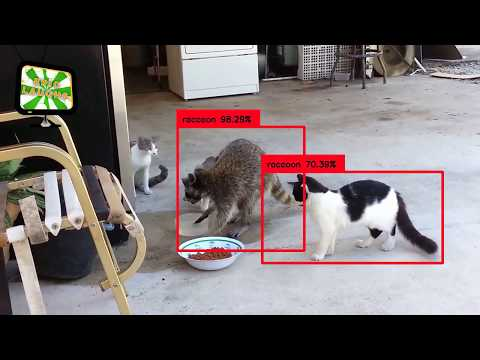

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('lxLyLIL7OsU', width=800, height=300)


In [2]:
# Install the latest ultralytics package
!pip install ultralytics

# Install other required packages
!pip install opencv-python matplotlib pillow seaborn


  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached pandas-2.2.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached charset_normalizer-3.4.1-cp310-cp310-macosx_10_9_universal2.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 24.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 4.8 MB/s eta 0:00:0000:0100:01
Using cached pandas-2.2.3-cp310-cp310-macosx_11_0_arm64.whl (11.3 MB)
Using cached requests-2.32.3-py3-none-any.whl 

In [3]:
# Import necessary libraries
import torch
from ultralytics import YOLO
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/cgy/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### Preparing the Image for Detection
We'll define a function to load and preprocess the image. YOLOv11 expects images in a specific format, but the ultralytics package handles most preprocessing steps internally.

In [4]:
def load_image(image_path):
    """
    Load an image from disk.

    Parameters:
    - image_path (str): Path to the image file.

    Returns:
    - image (PIL.Image): Loaded image.
    """
    image = Image.open(image_path).convert('RGB')
    return image


### Performing Object Detection
Using the loaded model, we'll perform object detection on the image. The ultralytics package handles model inference seamlessly.

In [5]:
def perform_detection(model, image):
    """
    Perform object detection on an image using the YOLOv11 model.

    Parameters:
    - model (YOLO): Loaded YOLOv11 model.
    - image (PIL.Image): Image on which to perform detection.

    Returns:
    - results (ultralytics.yolo.engine.results.Results): Detection results.
    """
    # Perform inference
    results = model(image)

    return results


### Processing and Visualizing the Results
We'll extract bounding boxes, labels, and confidence scores from the detection results and visualize them on the image.


In [6]:
def process_and_visualize(results, image, conf_threshold=0.6, iou_threshold=0.5):
    """
    Process detection results and visualize bounding boxes on the image.

    Parameters:
    - results (ultralytics.yolo.engine.results.Results): Detection results.
    - image (PIL.Image): Original image.
    - conf_threshold (float): Confidence threshold to filter detections.
    - iou_threshold (float): IoU threshold for Non-Max Suppression.

    Returns:
    - None
    """
    # Convert PIL image to numpy array for OpenCV
    image_np = np.array(image)
    
    # Extract detections
    detections = results[0].boxes  # Assuming batch size of 1

    # Iterate through detections
    for det in detections:
        # Get confidence score
        conf = det.conf.item()
        if conf < conf_threshold:
            continue

        # Get class label
        class_id = int(det.cls.item())
        label = results[0].names[class_id]

        # Get bounding box coordinates
        x1, y1, x2, y2 = det.xyxy.tolist()[0]  # [xmin, ymin, xmax, ymax]

        # Draw bounding box
        cv2.rectangle(image_np, (int(x1), int(y1)), (int(x2), int(y2)), (255, 255, 255), 2)

        # Prepare label text
        label_text = f"{label} ({conf:.2f})"

        # Set font parameters
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        font_thickness = 1

        # Calculate text size
        (text_width, text_height), _ = cv2.getTextSize(label_text, font, font_scale, font_thickness)

        # Draw filled rectangle for text background
        cv2.rectangle(image_np, (int(x1), int(y1) - text_height - 4),
                      (int(x1) + text_width, int(y1)), (255, 255, 255), -1)

        # Put label text above the bounding box
        cv2.putText(image_np, label_text, (int(x1), int(y1) - 2),
                    font, font_scale, (0, 0, 0), font_thickness, cv2.LINE_AA)

    # Convert back to PIL Image for visualization with matplotlib
    image_with_boxes = Image.fromarray(image_np)

    # Display the image with bounding boxes
    plt.figure(figsize=(12, 8))
    plt.imshow(image_with_boxes)
    plt.axis('off')
    plt.show()

    # Print detected objects and their scores
    for det in detections:
        conf = det.conf.item()
        if conf < conf_threshold:
            continue
        class_id = int(det.cls.item())
        label = results[0].names[class_id]
        print(f"{label}: {conf * 100:.2f}%")


### Saving Detection Results
To save the images with bounding boxes instead of just displaying them, modify the ```process_and_visualize``` function to save the images.

In [7]:
def process_and_save(results, image, output_path, conf_threshold=0.6, iou_threshold=0.5):
    """
    Process detection results, draw bounding boxes on the image, and save the result.

    Parameters:
    - results (ultralytics.yolo.engine.results.Results): Detection results.
    - image (PIL.Image): Original image.
    - output_path (str): Path to save the output image.
    - conf_threshold (float): Confidence threshold to filter detections.
    - iou_threshold (float): IoU threshold for Non-Max Suppression.

    Returns:
    - None
    """
    # Convert PIL image to numpy array for OpenCV
    image_np = np.array(image)
    
    # Extract detections
    detections = results[0].boxes  # Assuming batch size of 1

    # Iterate through detections
    for det in detections:
        # Get confidence score
        conf = det.conf.item()
        if conf < conf_threshold:
            continue

        # Get class label
        class_id = int(det.cls.item())
        label = results[0].names[class_id]

        # Get bounding box coordinates
        x1, y1, x2, y2 = det.xyxy.tolist()[0]  # [xmin, ymin, xmax, ymax]

        # Draw bounding box
        cv2.rectangle(image_np, (int(x1), int(y1)), (int(x2), int(y2)), (255, 255, 255), 2)

        # Prepare label text
        label_text = f"{label} ({conf:.2f})"

        # Set font parameters
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        font_thickness = 1

        # Calculate text size
        (text_width, text_height), _ = cv2.getTextSize(label_text, font, font_scale, font_thickness)

        # Draw filled rectangle for text background
        cv2.rectangle(image_np, (int(x1), int(y1) - text_height - 4),
                      (int(x1) + text_width, int(y1)), (255, 255, 255), -1)

        # Put label text above the bounding box
        cv2.putText(image_np, label_text, (int(x1), int(y1) - 2),
                    font, font_scale, (0, 0, 0), font_thickness, cv2.LINE_AA)

    # Convert back to PIL Image for saving
    image_with_boxes = Image.fromarray(image_np)

    # Save the image with bounding boxes
    image_with_boxes.save(output_path)

    # Print detected objects and their scores
    for det in detections:
        conf = det.conf.item()
        if conf < conf_threshold:
            continue
        class_id = int(det.cls.item())
        label = results[0].names[class_id]
        print(f"{label}: {conf * 100:.2f}%")


100%|██████████| 5.35M/5.35M [00:00<00:00, 31.2MB/s]



0: 416x640 7 elephants, 49.4ms
Speed: 2.0ms preprocess, 49.4ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)
elephant: 90.20%
elephant: 88.70%
elephant: 80.93%
elephant: 80.04%
elephant: 71.83%


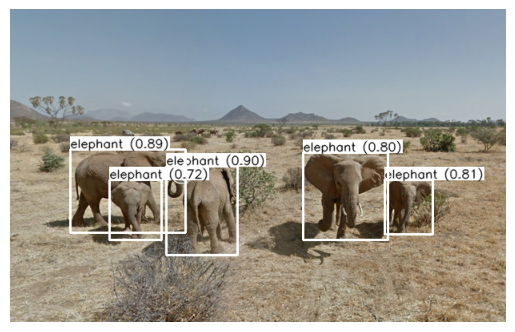

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the input image
photo_filename = './imgs/test.png'  # Replace with your image path
output_filename = './objdet_output.png'  # Output image path

# Load the image
image = load_image(photo_filename)

# Load the YOLOv11 model
model = YOLO('yolo11n.pt')  # Choose the desired model size

# Perform detection
results = perform_detection(model, image)

# Process and save the results
process_and_save(results, image, output_filename, conf_threshold=0.6, iou_threshold=0.5)

img = mpimg.imread(output_filename)
plt.imshow(img)
plt.axis("off")
plt.show()

## Image segmentation

### Performing Instance Segmentation
Use the loaded model to perform instance segmentation on the image. YOLOv11 provides models specifically tailored for segmentation tasks.


In [9]:
def perform_segmentation(model, image):
    """
    Perform instance segmentation on an image using the YOLOv11 model.

    Parameters:
    - model (YOLO): Loaded YOLOv11 model.
    - image (PIL.Image): Image on which to perform segmentation.

    Returns:
    - results (List[ultralytics.yolo.engine.results.Results]): Segmentation results.
    """
    # Perform inference
    results = model(image)
    return results


### Processing and Visualizing Segmentation Results
Extract segmentation masks, bounding boxes, labels, and confidence scores from the results, and visualize them on the image.

In [10]:
def process_and_visualize_segmentation(results, image, output_path, conf_threshold=0.6):
    """
    Process segmentation results and visualize bounding boxes and masks on the image.

    Parameters:
    - results (List[ultralytics.yolo.engine.results.Results]): Segmentation results.
    - image (PIL.Image): Original image.
    - output_path (str): Path to save the output image.
    - conf_threshold (float): Confidence threshold to filter detections.

    Returns:
    - None
    """
    # Check if there are any detection results
    if not results:
        print("No detections were made.")
        return

    # Access the first result (assuming a single image input)
    detection = results[0]

    # Extract boxes and masks
    boxes = detection.boxes
    masks = detection.masks.data  # List of masks corresponding to each detection

    # Convert PIL image to NumPy array for OpenCV drawing
    image_np = np.array(image)

    # Create an empty mask layer for segmentation visualization
    mask_layer = np.zeros_like(image_np, dtype=np.uint8)

    # Define a color map for different classes
    unique_class_ids = [int(det.cls.item()) for det in boxes if det.conf.item() >= conf_threshold]
    unique_class_ids = list(set(unique_class_ids))
    color_map = {class_id: np.random.randint(0, 255, (3,), dtype=np.uint8).tolist() for class_id in unique_class_ids}

    # Iterate through all detections and corresponding masks
    for det, mask in zip(boxes, masks):
        # Get confidence score
        conf = det.conf.item()
        if conf < conf_threshold:
            continue

        # Get class label
        class_id = int(det.cls.item())
        label = detection.names[class_id]

        # Get bounding box coordinates
        x1, y1, x2, y2 = det.xyxy.tolist()[0]  # [xmin, ymin, xmax, ymax]

        # Binarize the mask (assuming mask is in [0,1] range)
        # Convert PyTorch Tensor to NumPy array before applying astype
        mask_np = (mask > 0.5).cpu().numpy().astype(np.uint8) * 255

        # Assign a unique color to the class
        color = color_map[class_id]

        # Resize mask if necessary
        if mask_np.shape[0] != image.height or mask_np.shape[1] != image.width:
            # Resize mask to match image size
            mask_resized = cv2.resize(mask_np, (image.width, image.height), interpolation=cv2.INTER_NEAREST)
        else:
            mask_resized = mask_np

        # Create a colored mask
        colored_mask = np.zeros_like(image_np, dtype=np.uint8)
        colored_mask[:, :] = color
        colored_mask = cv2.bitwise_and(colored_mask, colored_mask, mask=mask_resized)

        # Combine with the mask layer
        mask_layer = cv2.bitwise_or(mask_layer, colored_mask)

        # Draw bounding box
        cv2.rectangle(image_np, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)

        # Prepare label text
        label_text = f"{label} ({conf:.2f})"

        # Set font parameters
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        font_thickness = 1

        # Calculate text size
        (text_width, text_height), _ = cv2.getTextSize(label_text, font, font_scale, font_thickness)

        # Draw filled rectangle for text background
        cv2.rectangle(image_np, (int(x1), int(y1) - text_height - 4),
                      (int(x1) + text_width, int(y1)), color, -1)

        # Put label text above the bounding box
        cv2.putText(image_np, label_text, (int(x1), int(y1) - 2),
                    font, font_scale, (0, 0, 0), font_thickness, cv2.LINE_AA)

    # Overlay the mask layer on the original image
    image_with_masks = cv2.addWeighted(image_np, 1, mask_layer, 0.5, 0)

    # Convert back to PIL Image for saving
    image_with_boxes_and_masks = Image.fromarray(image_with_masks)

    # Save the image with bounding boxes and segmentation masks
    image_with_boxes_and_masks.save(output_path)

    # Display the image
    plt.figure(figsize=(12, 8))
    plt.imshow(image_with_boxes_and_masks)
    plt.axis('off')
    plt.show()

    # Print detected objects and their confidence scores
    for det in boxes:
        conf = det.conf.item()
        if conf < conf_threshold:
            continue
        class_id = int(det.cls.item())
        label = detection.names[class_id]
        print(f"{label}: {conf * 100:.2f}%")

### Instance Segmentation
Combining all the above sections, here's the complete script that performs instance segmentation using YOLOv11 in PyTorch with English comments.

100%|██████████| 5.90M/5.90M [00:00<00:00, 7.57MB/s]

0: 416x640 6 elephants, 81.8ms
Speed: 1.0ms preprocess, 81.8ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 640)


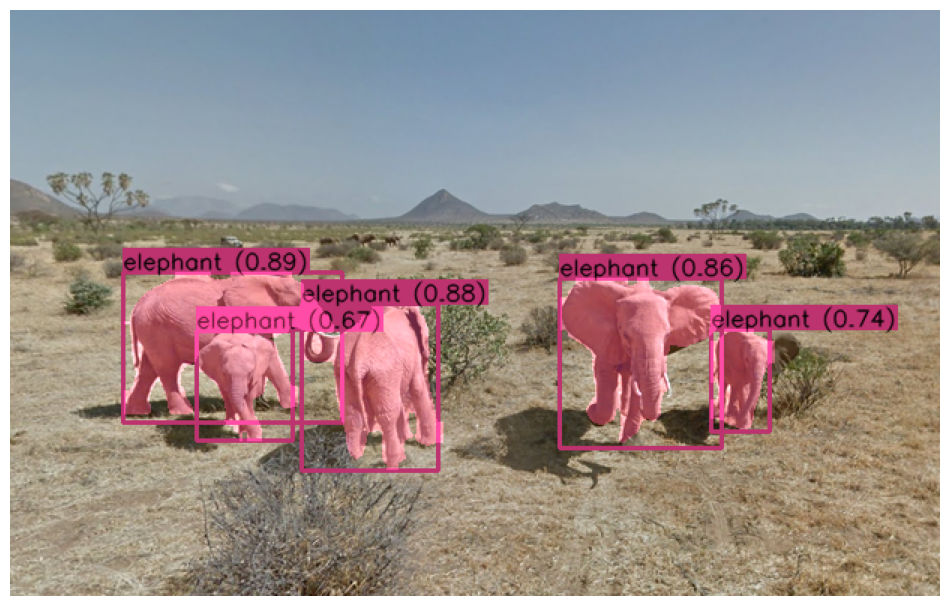

elephant: 88.87%
elephant: 88.21%
elephant: 86.19%
elephant: 73.93%
elephant: 66.54%


In [11]:
# Input image path
photo_filename = 'imgs/test.png'  # Replace with your image path
output_filename = 'objdet_output_seg.png'  # Output image path

# Load the image
image = load_image(photo_filename)

# Load the YOLOv11 instance segmentation model (pre-trained on COCO)
# Choose the desired model size and task type:
# - 'yolov11n-seg.pt': Nano
# - 'yolov11s-seg.pt': Small
# - 'yolov11m-seg.pt': Medium
# - 'yolov11l-seg.pt': Large
# - 'yolov11x-seg.pt': Extra Large
model = YOLO('yolo11n-seg.pt')  # Replace with desired model size and task type

# Move the model to GPU if available
if torch.cuda.is_available():
    model = model.to('cuda')

# Perform instance segmentation
results = perform_segmentation(model, image)

# Process and visualize segmentation results
process_and_visualize_segmentation(results, image, output_filename, conf_threshold=0.6)


# Fine-Tuning YOLO for Custom Object Detection with PyTorch

## 1. Introduction

Fine-tuning a pre-trained YOLO model on your own dataset allows you to adapt it to detect custom objects. In this tutorial, we will cover:

- Preparing your custom dataset (images and annotations)
- Creating a configuration file (YAML) that specifies dataset paths and class names
- Using the Ultralytics YOLO framework to load a pre-trained model and fine-tune it
- Running the training loop and monitoring performance

## 2. Prerequisites

Make sure you have installed the necessary packages:

```bash
pip install ultralytics opencv-python matplotlib pillow
```

You’ll also need your dataset organized in the following structure:

```
/your_dataset/
├── images/
│   ├── train/
│   │   ├── img1.jpg
│   │   ├── img2.jpg
│   │   └── ...
│   └── val/
│       ├── imgA.jpg
│       ├── imgB.jpg
│       └── ...
└── labels/
    ├── train/
    │   ├── img1.txt
    │   ├── img2.txt
    │   └── ...
    └── val/
        ├── imgA.txt
        ├── imgB.txt
        └── ...
```

Each label file should be in the YOLO format (class_id, x_center, y_center, width, height) with values normalized between 0 and 1.

## 3. Creating the Dataset Configuration File

Create a YAML file (for example, `custom_data.yaml`) that specifies the dataset paths and class names:

```yaml
train: /path/to/your_dataset/images/train
val: /path/to/your_dataset/images/val

nc: 3  # number of classes in your custom dataset
names: ['class1', 'class2', 'class3']
```

Adjust the paths and class names according to your dataset.

## 4. Fine-Tuning the YOLO Model

Below is a sample Python script that loads a pre-trained YOLO model and fine-tunes it on your custom dataset.

```python
import torch
from ultralytics import YOLO

# Load a pre-trained YOLO model (for example, YOLOv8n)
model = YOLO('yolov8n.pt')  # You can choose a different variant if needed

# Start training by providing the dataset configuration file
results = model.train(data='custom_data.yaml', epochs=50, imgsz=640, batch=16, lr0=0.01)

# Once training is complete, you can evaluate on the validation set
metrics = model.val(data='custom_data.yaml')
print(metrics)
```

## 5. Monitoring Training and Evaluating the Model

- **Training Logs:** The Ultralytics framework provides live logs and optionally saves the training progress to a directory.
- **Evaluation:** The `model.val()` method outputs key metrics such as mAP (mean average precision) for your custom classes.
- **Inference:** After fine-tuning, test the model on new images using `model.predict('path/to/image.jpg')`.

## 6. Saving and Deploying the Model

Once fine-tuning is complete, you can save the final weights:

```python
model.save("yolov8n_finetuned.pt")
```

These weights can then be deployed or further integrated into your applications.

---

# Lecture Script: Fine-Tuning YOLO with PyTorch

## Slide 1: Title & Introduction

- **Title:** Fine-Tuning YOLO for Custom Object Detection Using PyTorch  
- **Introduction:**  
  "Welcome everyone. Today, I will show you how to fine-tune a pre-trained YOLO model using PyTorch so that it can detect objects specific to your custom dataset."

## Slide 2: Why Fine-Tune?

- Fine-tuning helps when you have a limited amount of data or when your target objects differ from the original training data.
- Benefits of transfer learning: reducing training time and improving performance.

## Slide 3: Dataset Preparation

- Outline the necessary dataset structure:
  - A folder for training images and labels.
  - A folder for validation images and labels.
- Explain the YOLO annotation format (class_id, x_center, y_center, width, height).

## Slide 4: Configuring the Dataset

- Introduce the YAML configuration file.
- Explain each field (`train`, `val`, `nc`, `names`).
- Show an example snippet of a YAML file.

## Slide 5: Fine-Tuning Process

- Introduce the Ultralytics YOLO framework.
- Walk through the provided Python code:
  - Loading a pre-trained model.
  - Training the model with a custom dataset.

## Slide 6: Monitoring and Evaluating

- Explain how training logs help in monitoring performance.
- Mention the evaluation process with mAP.
- Discuss running inference after training.

## Slide 7: Saving and Deployment

- Highlight the importance of saving the fine-tuned model.
- Discuss deployment options such as using it in applications.

## Slide 8: Conclusion and Q&A

- **Summary:**
  1. Dataset preparation and configuration.
  2. Fine-tuning using the YOLO framework.
  3. Monitoring training and evaluating the model.
  4. Saving and deploying the model.
- **Q&A:** "Thank you for your attention. Any questions?"

---

This completes our tutorial on fine-tuning YOLO using PyTorch. Enjoy exploring and building your own computer vision applications!
